In [1]:
# Importacion de librerias

import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import math
#from tensorflow.python.ops import math_ops
#import datetime
#import random
#from keras.callbacks import EarlyStopping

In [2]:
# Se cargan los vectores de entrada de Test X1_test y X2_test, 

# Se cargan los vectores de salida de Test y_test_cos y y_test_sin,  

base_dir = "C:/TESIS/data_preprocessing/Input_Output_Vectors/90_270_v5_1/revisado/"  
y_pred_cos = np.load(base_dir + 'y_pred_cos.npy')
y_pred_sin = np.load(base_dir + 'y_pred_sin.npy')
y_test_cos = np.load(base_dir + 'y_test_cos.npy')
y_test_sin = np.load(base_dir + 'y_test_sin.npy')


print('y_pred_cos',y_pred_cos.shape)
print('y_pred_sin',y_pred_cos.shape)
print('y_test_cos',y_test_cos.shape)
print('y_test_sin',y_test_sin.shape)

y_pred_cos (1663, 1)
y_pred_sin (1663, 1)
y_test_cos (1663,)
y_test_sin (1663,)


In [3]:
# Se importa el conjunto de datos  de Test

events_container_path= "C:/TESIS/data_preprocessing/Input_Output_Vectors/90_270_v5_1/revisado/invalid_removed/"
dataset_test= pd.read_pickle(events_container_path + "dataset_test.pkl")
dataset_test

Origin_Time  Latitude  Longitude  Depth  RMS   ML   Mc  \
0     2016-01-11T23:11:50.300000Z    19.927    -75.456    0.0  0.5  0.1  1.7   
1     2017-10-28T04:30:23.800000Z    19.897    -75.957   18.5  0.2  0.1  1.5   
2     2017-03-30T22:22:56.500000Z    19.892    -76.011    2.1  0.5  0.9  1.7   
3     2022-07-14T23:52:34.200000Z    19.799    -75.798    5.0  0.4  0.9  2.4   
4     2020-07-02T19:01:55.300000Z    19.605    -75.874   24.2  0.1  0.4  1.8   
...                           ...       ...        ...    ...  ...  ...  ...   
1658  2013-12-15T22:23:02.400000Z    19.955    -75.839   23.1  0.7  1.3  1.8   
1659  2018-03-05T07:51:19.400000Z    19.866    -75.500   32.3  0.3  1.1  2.1   
1660  2021-06-08T16:21:51.900000Z    19.823    -76.021    2.2  0.2  0.6  2.0   
1661  2014-11-19T01:35:00.000000Z    19.918    -75.639   34.2  0.0  0.2  2.0   
1662  2019-06-07T02:19:16.000000Z    19.797    -75.277   22.9  0.2  0.8  1.8   

        MW                       P_time                       S_time  ...  \
0     None  2016-01-11T23:11:55.310000Z  2016-01-11T23:12:00.130000Z  ...   
1     None  2017-10-28T04:30:29.190000Z  2017-10-28T04:30:33.340000Z  ...   
2      1.5  2017-03-30T22:23:02.260000Z  2017-03-30T22:23:06.430000Z  ...   
3     None  2022-07-14T23:52:38.370000Z  2022-07-14T23:52:41.620000Z  ...   
4     None  2020-07-02T19:02:03.180000Z  2020-07-02T19:02:09.180000Z  ...   
...    ...                          ...                          ...  ...   
1658   1.9  2013-12-15T22:23:06.620000Z                         None  ...   
1659  None  2018-03-05T07:51:25.260000Z  2018-03-05T07:51:29.600000Z  ...   
1660  None  2021-06-08T16:21:58.800000Z  2021-06-08T16:22:03.970000Z  ...   
1661  None  2014-11-19T01:35:05.200000Z  2014-11-19T01:35:09.170000Z  ...   
1662  None  2019-06-07T02:19:24.110000Z  2019-06-07T02:19:29.880000Z  ...   

      SNR_2_Z_S  SNR_2_N_S  SNR_2_E_S  SNR_2_Z_P  SNR_2_N_P  SNR_2_E_P  \
0     20.574681  21.529936  22.708077  10.518312    4.76797   3.120287   
1     18.111326  17.945597  21.022966  15.652623   4.429527   8.820252   
2     21.175672  25.085863  24.695206  23.464687  16.424032  21.601553   
3     31.661725  33.279206  23.221859  15.316448  13.822199  14.221784   
4     14.143985  20.434165   8.239799  12.025562  18.654294  17.887542   
...         ...        ...        ...        ...        ...        ...   
1658       None       None       None  18.816574  13.077403   9.382533   
1659  30.768004  37.027276  44.718428  34.473273  30.903744  35.350707   
1660  11.445073   8.017099  17.552178   3.575652   -1.93444   0.628263   
1661  18.080358  18.522888  20.240543  10.159155    6.01571   6.062766   
1662  29.127467   28.66657  34.249349  24.802124  21.348683  27.998954   

     Azimuth_radianes Is_Valid Distance_norm Azimuth  
0            1.867502     True      0.238182   107.0  
1            4.328417     True      0.266364   248.0  
2            4.380776     True      0.317273   251.0  
3            3.595378     True      0.220000   206.0  
4            3.543018     True      0.427273   203.0  
...               ...      ...           ...     ...  
1658         4.415683     True      0.140909   253.0  
1659         2.181662     True      0.228182   125.0  
1660         4.206243     True      0.354545   241.0  
1661         2.530727     True      0.095455   145.0  
1662         2.042035     True      0.446364   117.0  

[1663 rows x 33 columns]

In [4]:
y_pred_cos_1 = np.squeeze(y_pred_cos)
y_pred_sin_1 = np.squeeze(y_pred_sin)

In [5]:
print('y_pred_cos_1',y_pred_cos_1.shape)
print('y_pred_sin_1',y_pred_cos_1.shape)

y_pred_cos_1 (1663,)
y_pred_sin_1 (1663,)


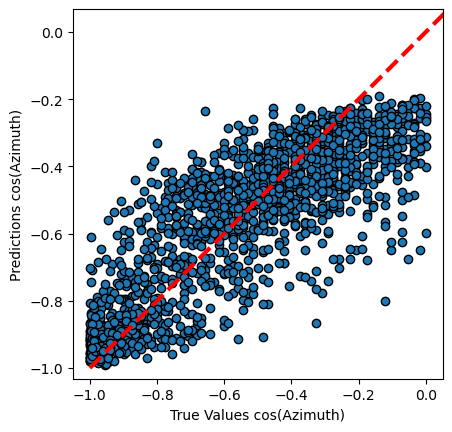

In [6]:
plt.scatter(y_test_cos,y_pred_cos_1, edgecolors='black')
plt.xlabel('True Values cos(Azimuth)')
plt.ylabel('Predictions cos(Azimuth)')
plt.axis('equal')
plt.axis('square')
ident = [-1.0, 1.0]
plt.plot(ident,ident,color="red", linestyle="--",linewidth=3)


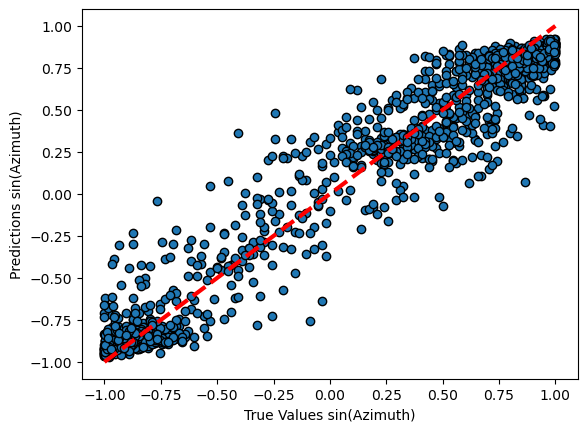

In [7]:
plt.scatter(y_test_sin,y_pred_sin_1, edgecolors='black')
plt.xlabel('True Values sin(Azimuth)')
plt.ylabel('Predictions sin(Azimuth)')
#plt.axis('equal')
#plt.axis('square')
ident = [-1.0, 1.0]
plt.plot(ident,ident,color="red", linestyle="--",linewidth=3)

Text(0, 0.5, 'Sen(azimuth)')

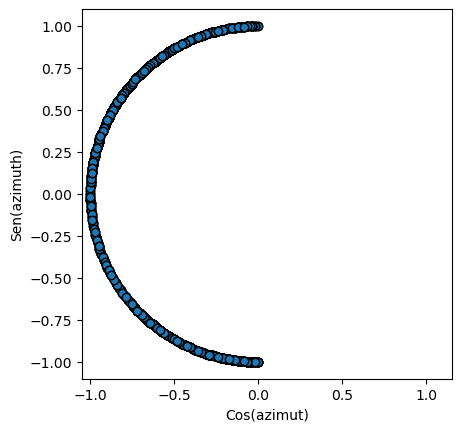

In [8]:
plt.scatter(y_test_cos,y_test_sin,  edgecolors='black' )
plt.axis('square')
plt.xlabel('Cos(azimut)')
plt.ylabel('Sen(azimuth)')

Text(0, 0.5, 'Sen(azimuth)')

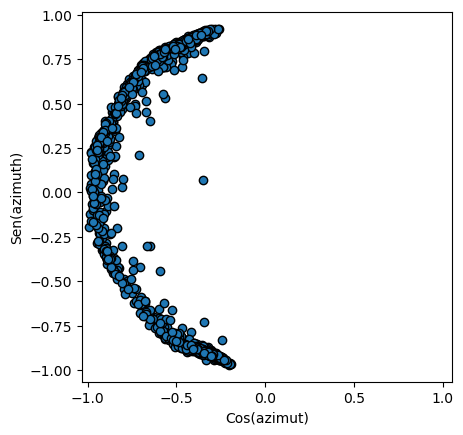

In [9]:
plt.scatter(y_pred_cos_1,y_pred_sin_1,  edgecolors='black' )
plt.axis('square')
plt.xlabel('Cos(azimut)')
plt.ylabel('Sen(azimuth)')

Text(0, 0.5, 'Sen(azimuth)')

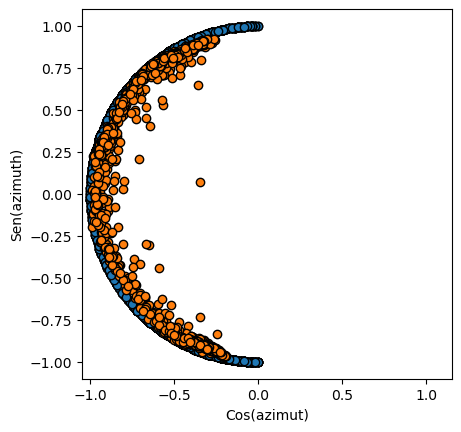

In [10]:
plt.scatter(y_test_cos,y_test_sin,  edgecolors='black' )
plt.scatter(y_pred_cos_1,y_pred_sin_1,  edgecolors='black' )
plt.axis('square')
plt.xlabel('Cos(azimut)')
plt.ylabel('Sen(azimuth)')

In [11]:
samples_number=len(y_pred_sin_1)
y_pred_degree=np.empty(shape=[samples_number])

for n in range(samples_number): 
    angle_rad = math.atan2(y_pred_sin_1[n],y_pred_cos_1[n])
    angle_degree= math.degrees(angle_rad)
    if (angle_degree < 0) :
        angle_degree = 360- abs(angle_degree)
    y_pred_degree[n]=angle_degree
#y_pred_degree
    

In [12]:
y_pred_degree.shape

(1663,)

In [13]:
y_test_degree = dataset_test['Azimuth']


In [14]:
y_distance = dataset_test['Distance']

In [15]:
y_test_degree.shape

(1663,)

In [16]:
samples_number=len(y_test_degree)
y_residual=np.empty(shape=[samples_number])

for n in range(samples_number):
    angle_diff =y_pred_degree[n] - y_test_degree[n]
    #print('angle_diff:',angle_diff)
    correction = abs(180 - abs(angle_diff))
    #print('correction: ',correction)
    diff = 180 - correction
    #print(diff)
    if angle_diff >= 0 :
         y_residual[n]= diff 
    else:
         y_residual[n]= -diff         
    
y_residual.shape



    

(1663,)

In [17]:
# Calculo el R2 de la regresion 
SS_res =  np.sum(np.square( y_test_degree - y_pred_degree )) 
SS_tot = np.sum(np.square( y_test_degree - np.mean(y_test_degree) ) ) 
r2 =( 1 - SS_res/(SS_tot ) )
print('R2: ',r2)


R2:  0.948113786172


In [18]:
df = pd.DataFrame({'True Azimuth': y_test_degree, 'Predicted Azimuth': y_pred_degree, 'Error': y_residual})
pd.options.display.max_rows = None
df


True Azimuth  Predicted Azimuth      Error
0            107.0         126.844847  19.844847
1            248.0         250.011004   2.011004
2            251.0         243.810969  -7.189031
3            206.0         228.239431  22.239431
4            203.0         200.382380  -2.617620
5            165.0         189.982473  24.982473
6            136.0         131.379715  -4.620285
7            261.0         253.734819  -7.265181
8            254.0         252.933586  -1.066414
9            255.0         249.827214  -5.172786
10           142.0         145.723645   3.723645
11           256.0         252.643041  -3.356959
12           235.0         244.085254   9.085254
13           130.0         124.752901  -5.247099
14           111.0         113.525108   2.525108
15           107.0         119.924080  12.924080
16           255.0         251.235018  -3.764982
17           110.0         117.930635   7.930635
18           168.0         163.258254  -4.741746
19           109.0         123.459370  14.459370
20           244.0         252.903368   8.903368
21           169.0         162.738955  -6.261045
22            92.0         111.865475  19.865475
23           123.0         122.970338  -0.029662
24           240.0         249.385371   9.385371
25           235.0         248.205399  13.205399
26            99.0         113.919730  14.919730
27            97.0         114.468761  17.468761
28           252.0         255.007003   3.007003
29           127.0         116.006422 -10.993578
30           172.0         163.062971  -8.937029
31           250.0         251.340814   1.340814
32           106.0         115.535474   9.535474
33           197.0         193.440883  -3.559117
34           248.0         247.350672  -0.649328
35           166.0         165.986238  -0.013762
36           262.0         255.201056  -6.798944
37           244.0         248.110203   4.110203
38           164.0         165.767252   1.767252
39           146.0         152.393348   6.393348
40           247.0         242.453747  -4.546253
41           239.0         239.149589   0.149589
42           170.0         164.857412  -5.142588
43           214.0         235.430816  21.430816
44           117.0         123.291584   6.291584
45           107.0         123.112145  16.112145
46           152.0         163.752970  11.752970
47           137.0         132.880501  -4.119499
48           122.0         113.253493  -8.746507
49           250.0         248.082697  -1.917303
50           254.0         242.974060 -11.025940
51           168.0         164.463754  -3.536246
52           242.0         249.665354   7.665354
53           241.0         236.490645  -4.509355
54           108.0         115.109185   7.109185
55           200.0         213.648546  13.648546
56           163.0         165.070700   2.070700
57           103.0         118.568311  15.568311
58           161.0         158.386344  -2.613656
59           267.0         222.594110 -44.405890
60           253.0         252.706725  -0.293275
61           165.0         165.056317   0.056317
62           250.0         251.847104   1.847104
63           146.0         139.773651  -6.226349
64           232.0         238.676143   6.676143
65           173.0         152.609847 -20.390153
66           133.0         152.464215  19.464215
67           104.0         115.944509  11.944509
68           256.0         255.869884  -0.130116
69           251.0         253.246652   2.246652
70           140.0         133.135850  -6.864150
71           261.0         250.113731 -10.886269
72           247.0         245.535655  -1.464345
73            96.0         110.081614  14.081614
74           245.0         251.795065   6.795065
75           250.0         236.982577 -13.017423
76           155.0         159.913455   4.913455
77           152.0         128.833543 -23.166457
78           160.0         143.467024 -16.532976
79           260.0         248.216424 -11.783576
80           111.0         125.016563

In [19]:
df_sorted = df.sort_values('Error')
df_sorted

True Azimuth  Predicted Azimuth      Error
922          230.0         182.702454 -47.297546
883          204.0         157.320952 -46.679048
1229         241.0         194.552826 -46.447174
937          253.0         207.586411 -45.413589
59           267.0         222.594110 -44.405890
1117         255.0         210.784602 -44.215398
1586         249.0         204.961780 -44.038220
1153         194.0         150.198086 -43.801914
894          269.0         225.490527 -43.509473
1660         241.0         200.359718 -40.640282
425          270.0         229.785616 -40.214384
276          264.0         225.843982 -38.156018
543          260.0         224.875446 -35.124554
1535         175.0         139.981655 -35.018345
1109         212.0         177.109800 -34.890200
816          158.0         123.510920 -34.489080
283          173.0         139.005065 -33.994935
1301         194.0         160.225186 -33.774814
1354         155.0         121.552803 -33.447197
619          255.0         222.223888 -32.776112
912          150.0         117.392041 -32.607959
1491         207.0         174.881059 -32.118941
1428         167.0         135.058901 -31.941099
263          248.0         216.781789 -31.218211
1575         154.0         123.339862 -30.660138
707          144.0         113.480813 -30.519187
507          228.0         197.578197 -30.421803
108          258.0         227.756947 -30.243053
455          237.0         206.998734 -30.001266
1238         223.0         193.301457 -29.698543
551          190.0         160.497356 -29.502644
654          254.0         224.536245 -29.463755
471          152.0         123.604721 -28.395279
1176         195.0         166.781233 -28.218767
322          145.0         116.907542 -28.092458
362          196.0         168.202487 -27.797513
604          145.0         117.413963 -27.586037
1336         263.0         235.561379 -27.438621
764          149.0         121.636393 -27.363607
1536         266.0         239.337102 -26.662898
838          148.0         121.353445 -26.646555
863          148.0         121.483464 -26.516536
1282         233.0         206.675928 -26.324072
94           243.0         216.791826 -26.208174
1403         157.0         131.337944 -25.662056
1224         238.0         212.483295 -25.516705
1265         199.0         173.791349 -25.208651
474          154.0         128.847112 -25.152888
119          192.0         167.009888 -24.990112
726          263.0         238.123968 -24.876032
1531         152.0         127.258283 -24.741717
1454         192.0         167.270300 -24.729700
1086         184.0         159.333810 -24.666190
1235         176.0         151.485809 -24.514191
1574         172.0         147.500789 -24.499211
631          269.0         244.666901 -24.333099
354          185.0         160.956204 -24.043796
1607         145.0         120.967553 -24.032447
1113         141.0         117.056516 -23.943484
877          260.0         236.070461 -23.929539
1270         189.0         165.479145 -23.520855
160          148.0         124.542169 -23.457831
268          178.0         154.544111 -23.455889
906          191.0         167.586383 -23.413617
396          155.0         131.597226 -23.402774
1537         261.0         237.607099 -23.392901
77           152.0         128.833543 -23.166457
697          227.0         204.354397 -22.645603
952          169.0         146.606794 -22.393206
1050         202.0         179.653385 -22.346615
508          235.0         212.653788 -22.346212
612          261.0         238.764394 -22.235606
1598         225.0         202.903137 -22.096863
1415         268.0         245.916626 -22.083374
627          268.0         245.974190 -22.025810
1424         144.0         122.061254 -21.938746
1658         253.0         231.167431 -21.832569
1558         218.0         196.198739 -21.801261
1331         237.0         215.216088 -21.783912
680          140.0         118.280774 -21.719226
671          159.0         137.522547

In [20]:
df_sorted.loc[291]

True Azimuth         257.000000
Predicted Azimuth    249.416991
Error                 -7.583009
Name: 291, dtype: float64

In [21]:
#Para mostrar en el mapa
dataset_for_mapping = pd.DataFrame({'True Azimuth': y_test_degree, 'Predicted Azimuth': y_pred_degree, 'Distance': y_distance, 'Error': y_residual})
pd.options.display.max_rows = None
dataset_for_mapping


True Azimuth  Predicted Azimuth  Distance      Error
0            107.0         126.844847     26.20  19.844847
1            248.0         250.011004     29.30   2.011004
2            251.0         243.810969     34.90  -7.189031
3            206.0         228.239431     24.20  22.239431
4            203.0         200.382380     47.00  -2.617620
5            165.0         189.982473     16.40  24.982473
6            136.0         131.379715     44.50  -4.620285
7            261.0         253.734819     41.30  -7.265181
8            254.0         252.933586     42.70  -1.066414
9            255.0         249.827214    110.00  -5.172786
10           142.0         145.723645     17.80   3.723645
11           256.0         252.643041     46.70  -3.356959
12           235.0         244.085254     31.50   9.085254
13           130.0         124.752901     35.60  -5.247099
14           111.0         113.525108     47.60   2.525108
15           107.0         119.924080     26.20  12.924080
16           255.0         251.235018     54.30  -3.764982
17           110.0         117.930635     47.20   7.930635
18           168.0         163.258254     36.30  -4.741746
19           109.0         123.459370     50.60  14.459370
20           244.0         252.903368     30.90   8.903368
21           169.0         162.738955     33.60  -6.261045
22            92.0         111.865475     48.10  19.865475
23           123.0         122.970338     24.30  -0.029662
24           240.0         249.385371     33.40   9.385371
25           235.0         248.205399     40.10  13.205399
26            99.0         113.919730     70.20  14.919730
27            97.0         114.468761     53.40  17.468761
28           252.0         255.007003     75.30   3.007003
29           127.0         116.006422     42.80 -10.993578
30           172.0         163.062971     18.00  -8.937029
31           250.0         251.340814     69.10   1.340814
32           106.0         115.535474     63.80   9.535474
33           197.0         193.440883     22.20  -3.559117
34           248.0         247.350672     68.60  -0.649328
35           166.0         165.986238     18.80  -0.013762
36           262.0         255.201056    106.00  -6.798944
37           244.0         248.110203     58.00   4.110203
38           164.0         165.767252     39.50   1.767252
39           146.0         152.393348     16.70   6.393348
40           247.0         242.453747     86.30  -4.546253
41           239.0         239.149589     59.00   0.149589
42           170.0         164.857412     36.70  -5.142588
43           214.0         235.430816     23.20  21.430816
44           117.0         123.291584     34.00   6.291584
45           107.0         123.112145     32.00  16.112145
46           152.0         163.752970     38.60  11.752970
47           137.0         132.880501     27.00  -4.119499
48           122.0         113.253493     57.40  -8.746507
49           250.0         248.082697     40.30  -1.917303
50           254.0         242.974060     44.90 -11.025940
51           168.0         164.463754     33.40  -3.536246
52           242.0         249.665354     41.50   7.665354
53           241.0         236.490645     29.30  -4.509355
54           108.0         115.109185     30.10   7.109185
55           200.0         213.648546     97.80  13.648546
56           163.0         165.070700     44.00   2.070700
57           103.0         118.568311     47.50  15.568311
58           161.0         158.386344     25.00  -2.613656
59           267.0         222.594110     16.90 -44.405890
60           253.0         252.706725    105.00  -0.293275
61           165.0         165.056317     32.30   0.056317
62           250.0         251.847104     38.30   1.847104
63           146.0         139.773651     42.90  -6.226349
64           232.0         238.676143     51.10   6.676143
65           173.0         152.609847     22.30 -20.390153
66           133.0         152.464215     32.50  19.4

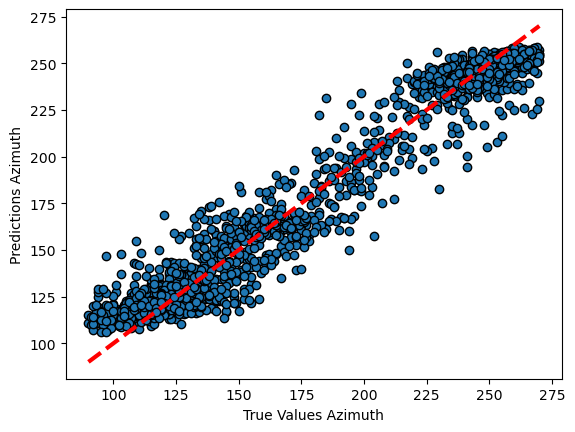

In [22]:
plt.scatter(y_test_degree,y_pred_degree, edgecolors='black')
plt.xlabel('True Values Azimuth')
plt.ylabel('Predictions Azimuth')
ident = [90.0, 270.0]
plt.plot(ident,ident,color="red", linestyle="--",linewidth=3)

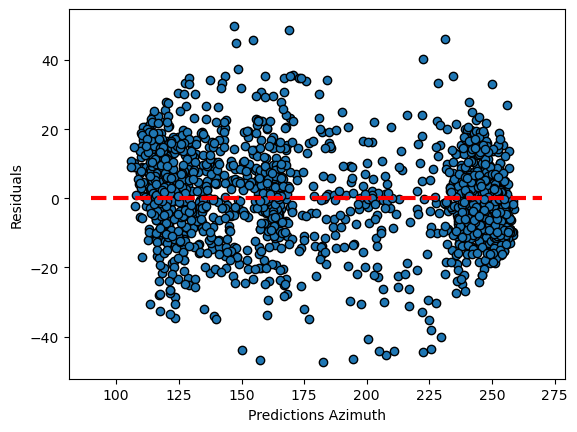

In [23]:
plt.scatter(y_pred_degree,y_residual, edgecolors='black')
plt.xlabel('Predictions Azimuth')
plt.ylabel('Residuals')
ident = [90,270]
ident1 =[0,0]
plt.plot(ident,ident1,color="red", linestyle="--",linewidth=3)

In [24]:
new_dataset = dataset_test.copy()

In [27]:
new_dataset['Residuals']= y_residual
new_dataset

Origin_Time  Latitude  Longitude  Depth  RMS   ML   Mc  \
0     2016-01-11T23:11:50.300000Z    19.927    -75.456    0.0  0.5  0.1  1.7   
1     2017-10-28T04:30:23.800000Z    19.897    -75.957   18.5  0.2  0.1  1.5   
2     2017-03-30T22:22:56.500000Z    19.892    -76.011    2.1  0.5  0.9  1.7   
3     2022-07-14T23:52:34.200000Z    19.799    -75.798    5.0  0.4  0.9  2.4   
4     2020-07-02T19:01:55.300000Z    19.605    -75.874   24.2  0.1  0.4  1.8   
5     2014-11-10T01:34:37.500000Z    19.852    -75.657   22.6  0.4  0.8  1.9   
6     2017-01-15T03:43:29.200000Z    19.704    -75.404    5.0  0.4  1.5  2.0   
7     2018-03-31T04:09:05.400000Z    19.940    -76.087    5.0  0.4  0.3  1.4   
8     2012-02-17T23:33:09.100000Z    19.891    -76.089   14.6  0.4  1.0  2.1   
9     2018-05-07T20:39:58.800000Z    19.739    -76.711   15.1  0.3  2.1  2.7   
10    2023-03-17T15:13:28.400000Z    19.868    -75.592   10.8  0.0  0.7  1.8   
11    2014-04-18T12:51:38.900000Z    19.893    -76.129    7.3  0.7  2.2  2.8   
12    2021-04-07T22:41:54.000000Z    19.831    -75.942   25.8  0.4  0.3  1.5   
13    2022-12-29T04:34:36.000000Z    19.790    -75.435   34.6  0.2  0.4  1.9   
14    2015-07-09T03:32:29.800000Z    19.841    -75.273   23.0  0.5  2.6  2.7   
15    2019-02-24T05:13:20.400000Z    19.927    -75.456   46.7  0.1  0.7  1.6   
16    2017-02-02T13:09:19.500000Z    19.869    -76.197   40.9  0.2  0.9  1.8   
17    2017-03-24T22:06:59.600000Z    19.847    -75.274   49.1  0.1  1.1  2.0   
18    2015-12-19T08:12:16.300000Z    19.674    -75.627    1.8  0.2  1.2  2.1   
19    2012-06-07T05:31:50.100000Z    19.845    -75.240   11.9  0.0  0.2  1.5   
20    2020-01-01T08:44:33.500000Z    19.874    -75.962   18.6  0.2  0.1  1.5   
21    2020-04-22T01:23:49.900000Z    19.697    -75.636   41.5  0.1  0.7  2.1   
22    2017-03-26T19:22:40.500000Z    19.979    -75.237   37.2  0.3  0.9  1.5   
23    2012-08-23T06:20:24.100000Z    19.877    -75.501   41.0  0.2  2.0  2.6   
24    2019-03-20T21:14:36.500000Z    19.846    -75.974   14.1  0.4  1.3  1.9   
25    2016-02-02T17:55:15.900000Z    19.785    -76.009    7.4  0.7  1.1  1.9   
26    2014-08-01T16:23:03.900000Z    19.899    -75.033   16.9  0.4  2.4  2.8   
27    2022-01-28T07:33:15.300000Z    19.939    -75.190   21.6  0.2  0.3  2.0   
28    2023-04-04T19:41:44.900000Z    19.783    -76.379   16.6  0.3  1.1  2.2   
29    2021-12-03T23:01:39.400000Z    19.764    -75.369    3.4  0.1  1.4  2.2   
30    2014-03-20T05:22:36.500000Z    19.835    -75.672   13.8  0.3  1.6  2.3   
31    2021-03-25T05:51:08.200000Z    19.787    -76.318    4.8  0.1  1.0  2.4   
32    2022-08-07T18:35:24.800000Z    19.835    -75.111    7.1  0.2  1.4  2.2   
33    2019-10-11T00:52:03.400000Z    19.804    -75.758    3.1  0.4  0.5  2.1   
34    2016-01-01T21:31:07.800000Z    19.763    -76.303    5.0  0.5  2.1  2.8   
35    2021-10-02T02:17:11.800000Z    19.831    -75.652    1.8  0.4  1.2  2.4   
36    2017-01-20T14:34:37.500000Z    19.871    -76.702    2.8  0.2  1.3  2.1   
37    2014-12-23T01:21:32.300000Z    19.765    -76.194   20.0  0.5  1.2  2.0   
38    2016-01-16T02:20:41.700000Z    19.653    -75.592   13.6  0.5  2.1  2.4   
39    2013-04-22T20:28:54.700000Z    19.871    -75.607   18.7  0.5  1.2  2.0   
40    2020-05-21T09:32:02.000000Z    19.690    -76.455    3.0  0.6  3.0  2.9   
41    2021-07-19T22:46:23.700000Z    19.723    -76.181    9.4  0.6  3.3  3.4   
42    2015-12-19T08:16:17.000000Z    19.669    -75.633    1.7  0.2  1.3  2.3   
43    2015-04-09T07:35:23.600000Z    19.822    -75.821   17.4  0.1  0.3  1.6   
44    2022-01-04T20:18:47.500000Z    19.855    -75.408   43.7  0.3  0.9  1.7   
45    2022-10-06T06:23:38.100000Z    19.912    -75.404   26.8  0.0  0.4  1.8   
46    2018-03-16T17:12:32.600000Z    19.688    -75.521   19.2  0.4  0.9  1.9   
47    2016-11-26T18:44:38.100000Z    19.816    -75.522   34.1  0.0  1.7  1.7   
48    2016-02-20T11:12:24.400000Z    19.718    -75.233    5.0  0.4  1.3  2.3   
49    2021-11-03T01:39

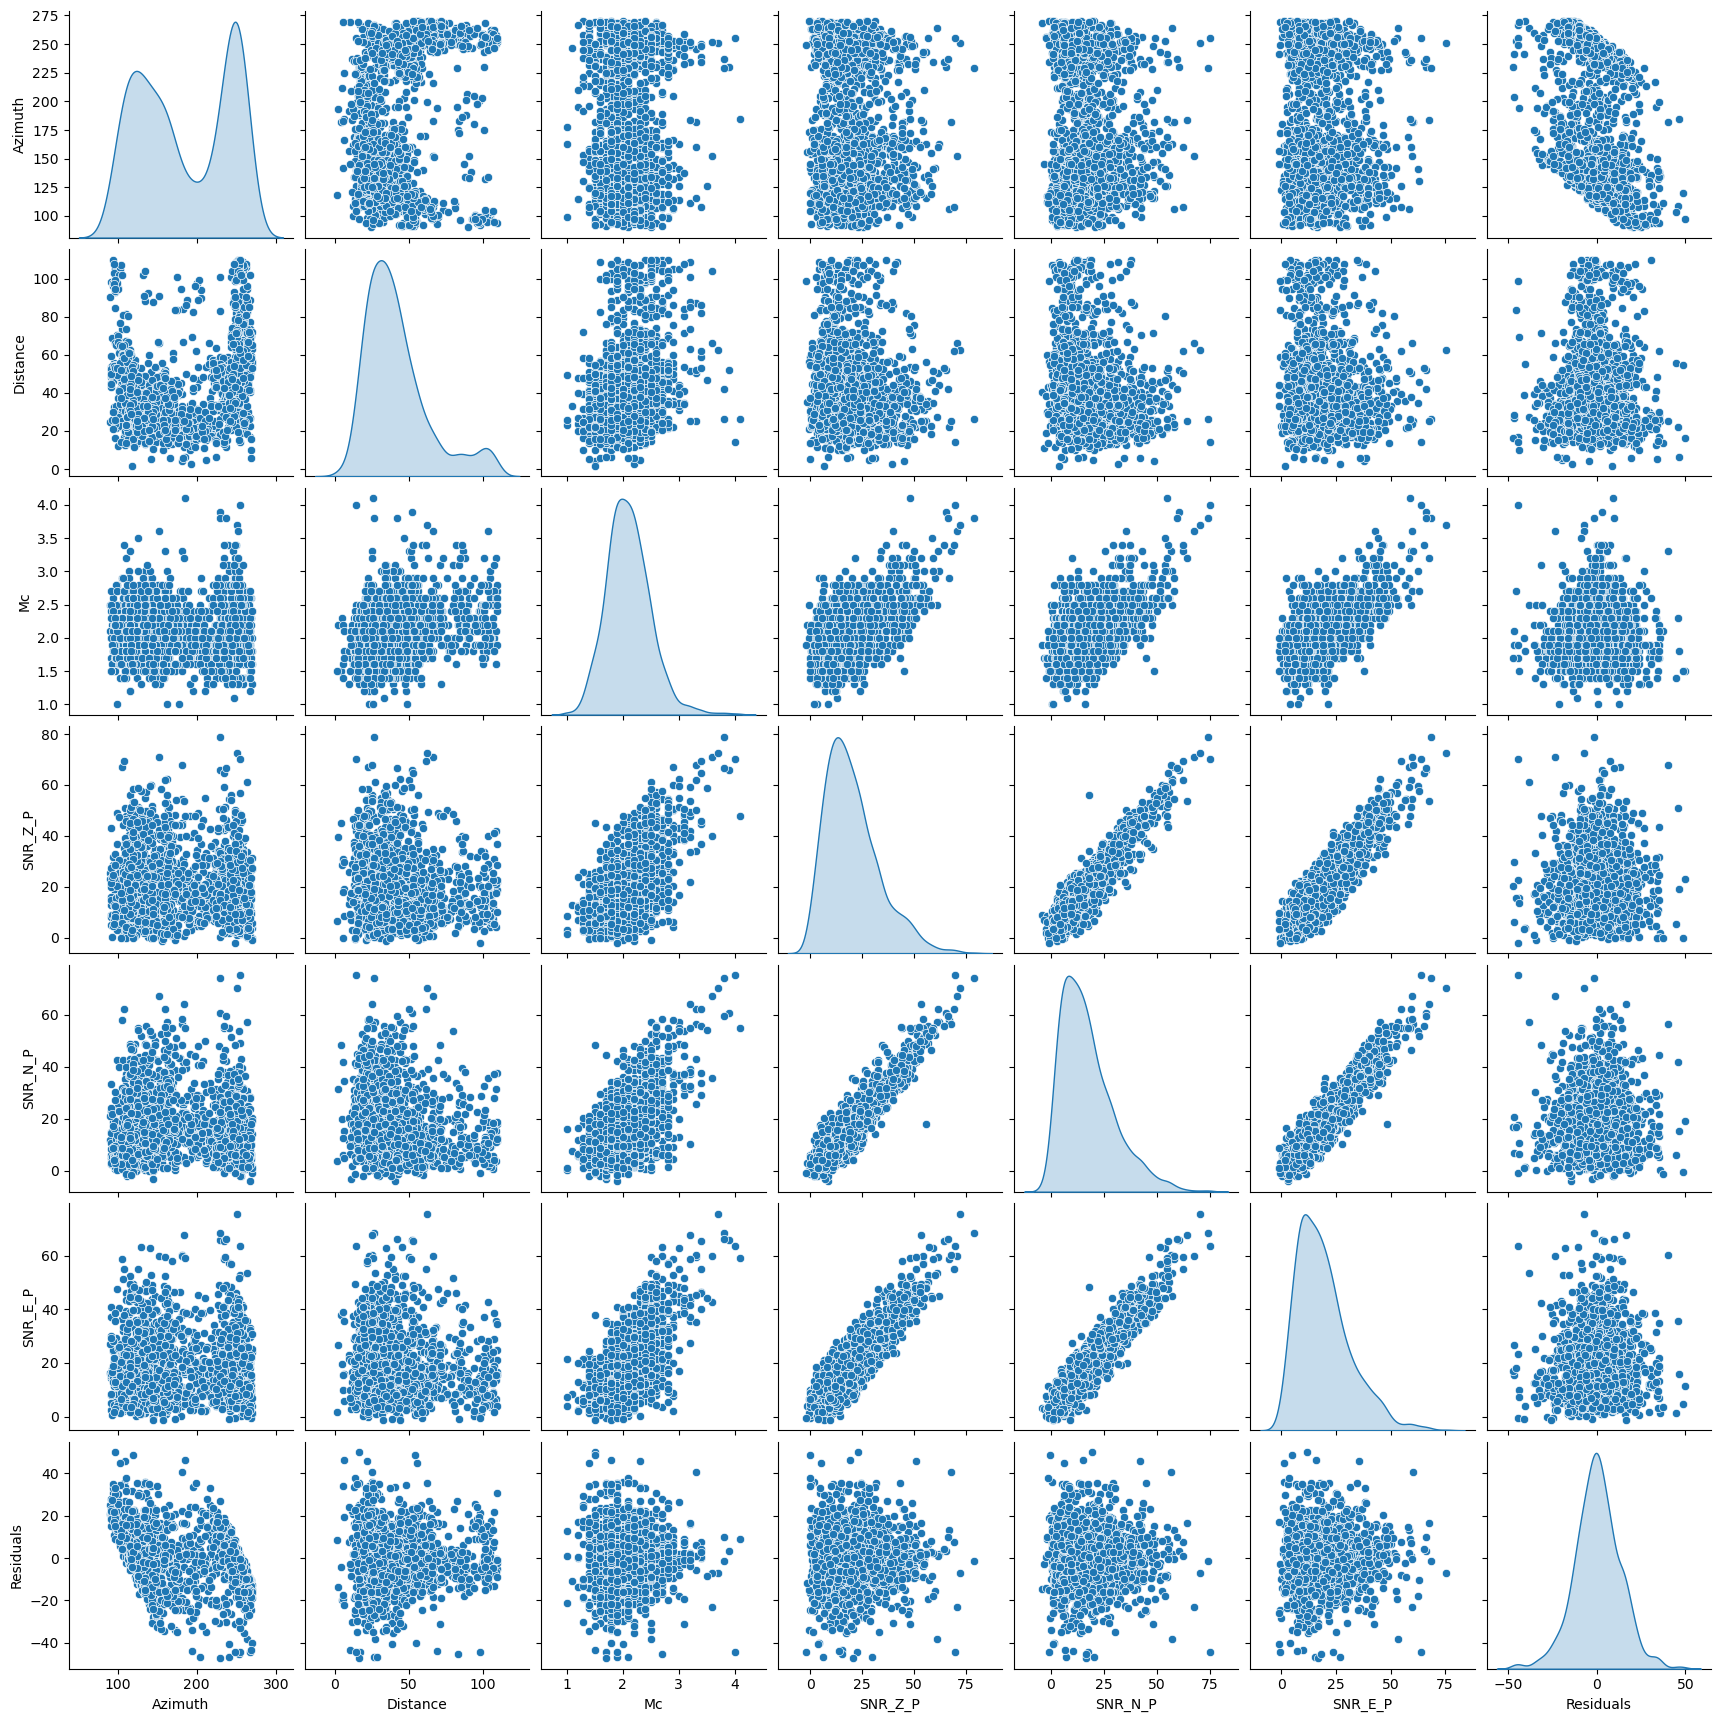

In [31]:
# Se muestra correlacion en los datos en el dataset de Test

sns.pairplot(new_dataset[['Azimuth','Distance','Mc', 'SNR_Z_P', 'SNR_N_P', 'SNR_E_P', 'Residuals']], diag_kind="kde")

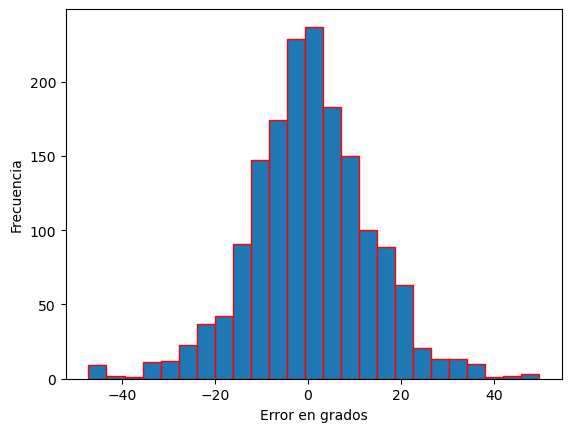

In [32]:
plt.hist(y_residual, edgecolor='red',bins = 25)
plt.xlabel("Error en grados")
_ = plt.ylabel("Frecuencia")

In [33]:
media = y_residual.mean()
print('Error Media :',media)

Error Media : 0.372037943431


In [41]:
mae = np.mean(np.absolute(y_residual))
print('Error MAE :',mae)

Error MAE : 9.94537441414


In [42]:
varianza = y_residual.var()
print('Error Varianza :',varianza)

Error Varianza : 171.066565385


In [43]:
std = y_residual.std()
print('Error Desviacion Standar :',std)

Error Desviacion Standar : 13.0792417741


In [44]:
# Salvo los dataset de Mapping
container_path= "C:\\TESIS\\data_preprocessing\\SNR_03_azimuth_ranged_Kfold_1\\revised_validation\\"
dataset_for_mapping.to_pickle(container_path +'dataset_for_mapping.pkl')
